# Looking at Sklearn's Labeled Faces on the Web Dataset
**In this notebook we load and analyze Sklearn's LFW image recognition dataset.**
* https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_lfw_people.html#sklearn.datasets.fetch_lfw_people
* https://scikit-learn.org/stable/datasets/index.html#labeled-faces-in-the-wild-dataset
* https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_lfw_people

# only load people that have N or more examples in the dataset
ds = fetch_lfw_people(min_faces_per_person=20, resize=0.4) 
X = pd.DataFrame(ds.data)
y = ds.target

print('features shape:', X.shape) 
print('target shape:', y.shape )

features shape: (2489, 1850)
target shape: (2489,)


In [6]:
print(ds.DESCR)

.. _labeled_faces_in_the_wild_dataset:

The Labeled Faces in the Wild face recognition dataset
------------------------------------------------------

This dataset is a collection of JPEG pictures of famous people collected
over the internet, all details are available on the official website:

    http://vis-www.cs.umass.edu/lfw/

Each picture is centered on a single face. The typical task is called
Face Verification: given a pair of two pictures, a binary classifier
must predict whether the two images are from the same person.

An alternative task, Face Recognition or Face Identification is:
given the picture of the face of an unknown person, identify the name
of the person by referring to a gallery of previously seen pictures of
identified persons.

Both Face Verification and Face Recognition are tasks that are typically
performed on the output of a model trained to perform Face Detection. The
most popular model for Face Detection is called Viola-Jones and is
implemented in the OpenC

## LFW Dataset Metadata
* 2489 rows
* 1850 columns 
* 43 classes 
* This data is pixel values for 50 * 37 images of cropped faces.    

In [7]:
X.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2489 entries, 0 to 2488
Data columns (total 1850 columns):
 #    Column  Dtype  
---   ------  -----  
 0    0       float32
 1    1       float32
 2    2       float32
 3    3       float32
 4    4       float32
 5    5       float32
 6    6       float32
 7    7       float32
 8    8       float32
 9    9       float32
 10   10      float32
 11   11      float32
 12   12      float32
 13   13      float32
 14   14      float32
 15   15      float32
 16   16      float32
 17   17      float32
 18   18      float32
 19   19      float32
 20   20      float32
 21   21      float32
 22   22      float32
 23   23      float32
 24   24      float32
 25   25      float32
 26   26      float32
 27   27      float32
 28   28      float32
 29   29      float32
 30   30      float32
 31   31      float32
 32   32      float32
 33   33      float32
 34   34      float32
 35   35      float32
 36   36      float32
 37   37      float32
 38   38   

**All the pixel values are similar so here we show the first 5 rows and 10 columns of the raw data**

In [8]:
pd.set_option('max_columns', None)
pd.set_option('max_colwidth', None)
X.iloc[0:5, 0:10]

,0,1,2,3,4,5,6,7,8,9
0,66.333336,84.000000,99.000000,102.000000,112.000000,114.333336,119.000000,122.666664,124.333336,138.333328
1,201.666672,181.000000,149.000000,134.666672,158.666672,181.333328,171.333328,167.333328,168.333328,168.333328
2,100.000000,105.333336,105.000000,116.333336,136.666672,137.333328,139.333328,148.000000,157.000000,156.000000
3,122.333336,131.666672,128.666672,130.666672,137.666672,144.000000,155.333328,166.333328,177.333328,184.000000
4,132.333328,136.666672,141.000000,144.000000,142.666672,144.666672,153.000000,161.666672,168.666672,174.666672


## The stratified_cross_validate() Helper Function
* We will use a helper function to view detailed performance and timing results from Sklearn's cross_validate()
* The helper function will work with any Sklearn estimator and cross validator. 
* This function defaults to 10-fold cross validation using StratifiedKFold with a random seed if no cross validation object is provided. 
* Using random_state=42 will create reproduceable cross validation results. 

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
import time

from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=42)

def stratified_cross_validate(model, X, y, cv=cv):
    start = time.time()
    cv_results = cross_validate(model, X, y, cv=cv, scoring="accuracy", n_jobs=-1)
    elapsed_time = (time.time() - start) 
    print ('Fold Scores:')
    print(' ')
    print(cv_results['test_score'])
    print(' ')
    print('Mean Accuracy: ', cv_results['test_score'].mean())
    print('Mean Fit Time: ', cv_results['fit_time'].mean())
    print('Mean Score Time: ', cv_results['score_time'].mean())
    print('CV Time: ', elapsed_time)
    return

## Here we create functions to perform 10-fold, stratified cross validation on multiple classifiers  

In [15]:
# Sklearn Classifiers 
from sklearn.naive_bayes import MultinomialNB, GaussianNB 
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
#from xgboost import XGBClassifier


models = [
    #XGBClassifier(),
    GaussianNB(), 
    MultinomialNB(),
    SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3,max_iter=5, 
                  tol=None, n_jobs=-1, random_state=42),
    RandomForestClassifier(n_estimators=200, max_depth=3, 
                           n_jobs=-1, random_state=42),
    LinearSVC(random_state=42),
    LogisticRegression(n_jobs=-1, random_state=42)
]

model_names = ['GaussianNB','MultinomialNB','SGDClassifier',
               'RandomForestClassifier','LinearSVC','LogisticRegression']


def test_models(X, y):
    for model, model_name in zip(models,model_names):
        print(model_name)
        print('--------------------------------')
        stratified_cross_validate(model,X,y)
        print(' ')

## Getting a Baseline Accuracy for the Dataset
**All of the classifiers perform rather poorly on the raw dataset.**
* LogisticRegression performs best on this dataset with a 10-fold cross validation accuracy of 66.45% in 260.40s
* LinearSVC also does well with a 10-fold cross validation accuracy of 62.31% in 23.41s

In [16]:
test_models(X,y)

GaussianNB
--------------------------------
Fold Scores:
 
[0.23694779 0.24899598 0.21285141 0.21285141 0.20481928 0.22088353
 0.22088353 0.18875502 0.19678715 0.20967742]
 
Mean Accuracy:  0.21534525197564452
Mean Fit Time:  0.15238687992095948
Mean Score Time:  0.8255727767944336
CV Time:  3.732008934020996
 
MultinomialNB
--------------------------------
Fold Scores:
 
[0.26104418 0.26506024 0.31325301 0.23694779 0.24096386 0.27710843
 0.24096386 0.28514056 0.24096386 0.25806452]
 
Mean Accuracy:  0.2619510299261562
Mean Fit Time:  0.1213148832321167
Mean Score Time:  0.006680893898010254
CV Time:  0.3679814338684082
 
SGDClassifier
--------------------------------
Fold Scores:
 
[0.18875502 0.15662651 0.28915663 0.21686747 0.2811245  0.19277108
 0.28915663 0.04016064 0.37751004 0.4516129 ]
 
Mean Accuracy:  0.24837414172820313
Mean Fit Time:  2.5364360332489015
Mean Score Time:  0.012050700187683106
CV Time:  4.3967883586883545
 
RandomForestClassifier
-----------------------------

### Can We Improve Our Baseline? 
* Below I scale the data and then peform PCA with n_components = to the total number of columns. 
* Next I plot the cumulative explained variance ratio to find the optimal number of components for PCA.
* I also the the PCA plot into a helper function so I can reuse it later.
* However, we will not transform the data using PCA until later.

In [17]:
from sklearn.preprocessing import StandardScaler
# Scale the data 
ss = StandardScaler()
X = ss.fit_transform(X)

### PCA Results on the Scaled Dataset
* The plot below shows that over 96% of the dataset's cumulative explained variance occurs by principal component 200.
* I use Numpy's cumsum() function to create a vector containing the cumulative sum of explained variable across all 1,850 principal components.  

Cumulative Explained variance at 200 components: 0.9648745250888169


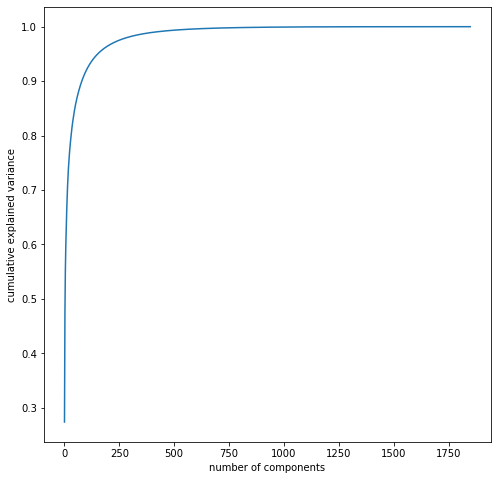

In [18]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def plot_pca(X):
    # Perform PCA on the data to reduce the number of initial features 
    # and to remove correlations that are common between pixel features 
    pca = PCA(n_components=X.shape[1])
    pca.fit(X)

    # Inspect the explained variances to determine how many components to use  
    plt.subplots(figsize=(8, 8))
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance');
    print('Cumulative Explained variance at 200 components:',sum(pca.explained_variance_ratio_[0:199]) )
    
plot_pca(X)

### Class Imbalance
* A quick inspection of the target classes we are trying to predict shows this is a 43 class problem.
* In a two class problem we have at least 1/2 = 50% accuracy even when guessing.
* This multi-class problem is much more complex with only 1/43 = 2.33% accuracy when guessing.
* To make things more challenging, we also have very imbalanced classes.
* It appears that class # 11 is by far the largest class.
* Classes 7, 9, 11, 12 and 40 appear disproportionately large compared to other classes as well.  

Total Records 2489
Total Classes: 43
Class Gini Index 0.9290543316264526
Smallest Class Id: 32 Records: 20
Largest Class Id: 11 Records: 530
Accuracy when Guessing: 2.33 %


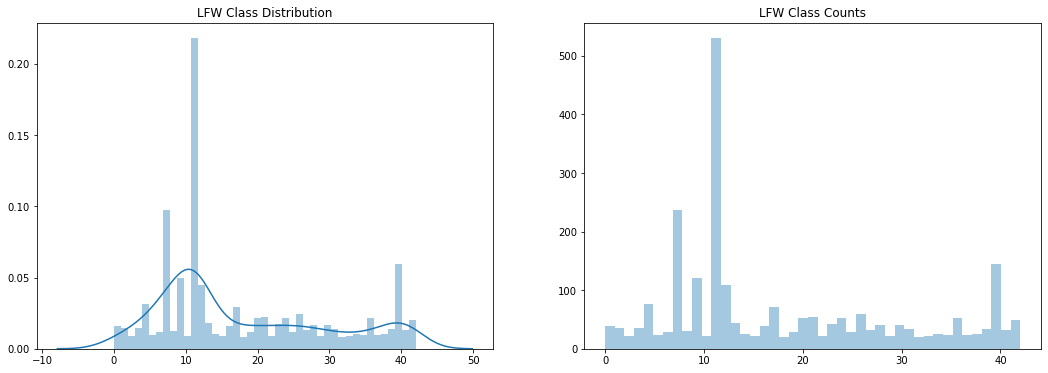

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Adapted from:
# https://www.featureranking.com/tutorials/machine-learning-tutorials/information-gain-computation/
def gini_index(y):
    probs = pd.value_counts(y,normalize=True)
    return 1 - np.sum(np.square(probs))

def plot_class_dist(y):
    fig, axarr = plt.subplots(1, 2, figsize=(18, 6))
    class_ct = len(np.unique(y))
    vc = pd.value_counts(y)
    print('Total Records', len(y))
    print('Total Classes:', class_ct)
    print('Class Gini Index', gini_index(y))
    print('Smallest Class Id:',vc.idxmin(),'Records:',vc.min())
    print('Largest Class Id:',vc.idxmax(),'Records:',vc.max())
    print('Accuracy when Guessing:', np.round( (1 / len(np.unique(y))) * 100, 2), '%')

    sns.distplot(y, ax=axarr[0], bins=class_ct).set_title('LFW Class Distribution');
    sns.distplot(y, ax=axarr[1], kde=False, bins=class_ct).set_title('LFW Class Counts');
    

plot_class_dist(y)

### Inspecting The Confusion Matrix 
* Here I use train_test_split to divide the data into 70% training and 30% testing random samples.   
* The top performing baseline LogisticRegression model is used to make predictions against the test data. 
* Finally, I plot a confusion matrix.
 * A perfect confusion matrix will only show shaded squares across the matrix diagonal. 
* However, the confusion matrix below shows that many class predictions are getting confused with the larger classes 7, 11, 12 and 40.
* This is evident by the high number of off-diagonal shaded boxes for each column.

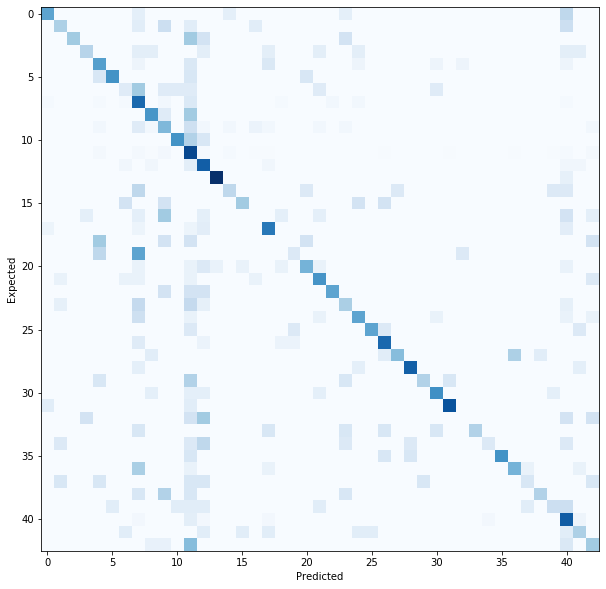

In [21]:
from sklearn.model_selection import train_test_split
from StrandSliceClassifier import StrandSliceClassifier
from sklearn.linear_model import LogisticRegression

# Break our data into 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

# Use StrandSliceClassifier to build a model and predict on the test set
strand = LogisticRegression(solver='liblinear', random_state=42)
strand.fit(X_train, y_train)
y_pred = strand.predict(X_test)

# Create a confusion matrix to see what classes StrandSliceClassifier is getting wrong 
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

plt.subplots(figsize=(10, 10))
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.imshow(cm_normalized,cmap=plt.get_cmap('Blues'),aspect='auto')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.grid(False)

### A Quick Fix for Imbalanced Classes
* One potiential solution is to adjust class weights inversely proportional to class frequencies in the input data.
* For LogisticRegression, this can be done by setting the class_weight parameter == to 'balanced'
* This sets each class_weight to n_samples / (n_classes * np.bincount(y))

**Unfortunately, our cross validation below shows that this approach only gives us a 3% boost in accuracy.**

In [22]:
lr = LogisticRegression(n_jobs=-1, random_state=42, class_weight="balanced")
stratified_cross_validate(lr, X, y, cv)

Fold Scores:
 
[0.7188755  0.70682731 0.69879518 0.67871486 0.6746988  0.70682731
 0.6626506  0.69879518 0.67871486 0.73790323]
 
Mean Accuracy:  0.6962802824200025
Mean Fit Time:  13.456813549995422
Mean Score Time:  0.007350516319274902
CV Time:  22.109195232391357


### Undersampling, Oversampling, and SMOTE
**In this section we use random sampling via the imblearn package to address this dataset's class imbalance problem.**
* First we undersample adjusting all class sizes to be equal to the smallest class.
 * The dataset is reduced from 2,489 records to 860 with each class containing only 20 records.
 * This approach is likely not desirable, since we lost over half of our data. 
* Next we undersample the majority class only reducing class 11 from 530 to 20 records.
 * This approach is not desirable, since class 7 still has 236 records. (Multiple classes are imbalanced in the dataset)
 * For this approach to work better, you would likely need to provide a dictionary to the RandomUnderSampler specifying how many records to undersample to for each class.   
* Finally, we use Synthetic Minority Over-sampling to over sample all classes, except the majority. 
 * This uses random sampling to increase under-represented classes to the majority size.
 * This approach could be problematic on large datasets.  In this case we increase the dataset rows from 2,489 to 22,790.

Total Records 860
Total Classes: 43
Class Gini Index 0.9767441860465116
Smallest Class Id: 42 Records: 20
Largest Class Id: 42 Records: 20
Accuracy when Guessing: 2.33 %


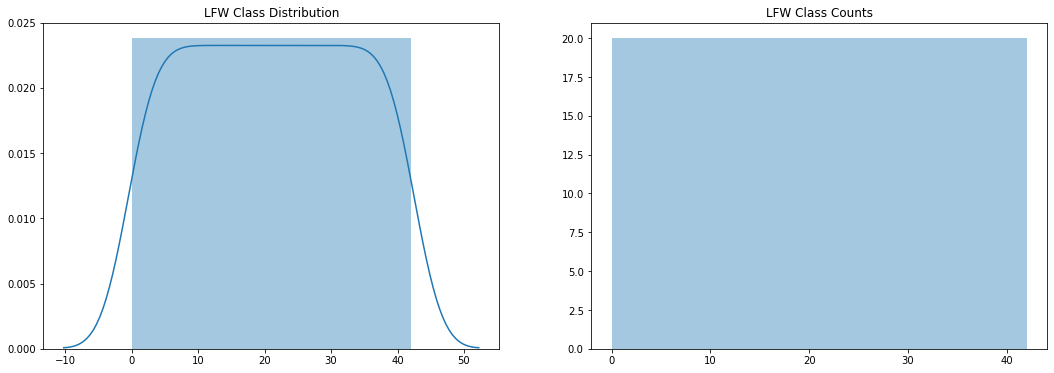

In [23]:
from imblearn.under_sampling import RandomUnderSampler

# Undersample the dataset using the RandomUnderSampler 
# Set all class sizes equal to the smallest class.
us = RandomUnderSampler()
X_us, y_us = us.fit_sample(X, y)

# Plot the new class distributions for y using the same funnction as above. 
plot_class_dist(y_us)

Total Records 1979
Total Classes: 43
Class Gini Index 0.9593975755028609
Smallest Class Id: 11 Records: 20
Largest Class Id: 7 Records: 236
Accuracy when Guessing: 2.33 %


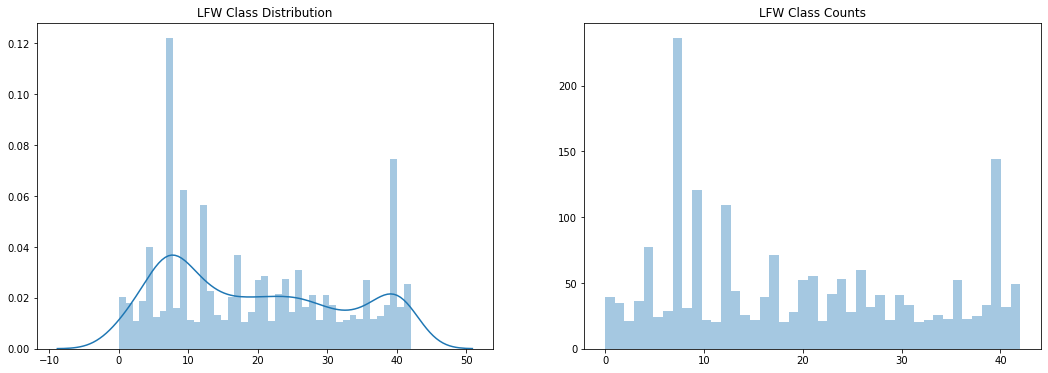

In [24]:
from imblearn.under_sampling import RandomUnderSampler

# Undersample the dataset using the RandomUnderSampler 
# Undersample the majority class only
us = RandomUnderSampler(sampling_strategy='majority')
X_us_maj, y_us_maj = us.fit_sample(X, y)

# Plot the new class distributions for y using the same funnction as above. 
plot_class_dist(y_us_maj)

Total Records 22790
Total Classes: 43
Class Gini Index 0.9767441860465116
Smallest Class Id: 31 Records: 530
Largest Class Id: 31 Records: 530
Accuracy when Guessing: 2.33 %


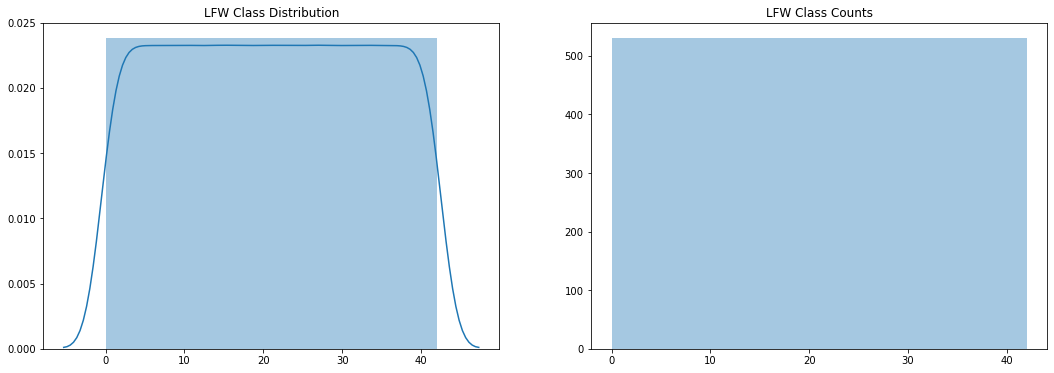

In [25]:
from imblearn.over_sampling import SMOTE

# Oversample using SMOTE
# Make all classes the same size as the majority class.
# WARNING - This can exponentially increase the size of the input dataset.
sm = SMOTE(sampling_strategy='not majority')
X_sm, y_sm = sm.fit_sample(X, y)

# Plot the new class distributions for y using the same funnction as above. 
plot_class_dist(y_sm)

### Testing the Adjusted Datasets 
**I perform 10-fold cross validation again to see which dataset above performs best using the LogisticRegression classifier, since it had the highest accuracy originally.  The original dataset has also been scaled now, so I re-run cross validation on it as well.**
* Original Dataset Scaled - 69.38% accuracy
* Minority Undersampled Dataset - 57.20% accuracy
* Majority Undersampled Dataset - 67.00% accuracy
* Oversample all Classes to Majority Dataset - **99.37% accuracy**

In [28]:
lr = LogisticRegression(n_jobs=-1, random_state=42)

print('Original Dataset Scaled')
print('----------------------------------------------------------------')
stratified_cross_validate(lr, X, y)
print('\nMinority Undersampled Dataset')
print('----------------------------------------------------------------')
stratified_cross_validate(lr, X_us, y_us)
print('\nMajority Undersampled Dataset')
print('----------------------------------------------------------------')
stratified_cross_validate(lr, X_us_maj, y_us_maj)
print('\nOversample all Classes to Majority Dataset')
print('----------------------------------------------------------------')
stratified_cross_validate(lr, X_sm, y_sm)

Original Dataset Scaled
----------------------------------------------------------------
Fold Scores:
 
[0.73895582 0.70682731 0.69879518 0.69076305 0.6626506  0.69879518
 0.64257028 0.69477912 0.66666667 0.73790323]
 
Mean Accuracy:  0.6938706438657858
Mean Fit Time:  14.041560435295105
Mean Score Time:  0.010090088844299317
CV Time:  23.35615611076355

Minority Undersampled Dataset
----------------------------------------------------------------
Fold Scores:
 
[0.59302326 0.56976744 0.55813953 0.52325581 0.65116279 0.48837209
 0.52325581 0.6627907  0.58139535 0.56976744]
 
Mean Accuracy:  0.572093023255814
Mean Fit Time:  8.047206592559814
Mean Score Time:  0.0
CV Time:  11.846484422683716

Majority Undersampled Dataset
----------------------------------------------------------------
Fold Scores:
 
[0.7020202  0.65151515 0.6969697  0.66161616 0.71717172 0.63131313
 0.64646465 0.61111111 0.66666667 0.71573604]
 
Mean Accuracy:  0.6700584525457622
Mean Fit Time:  13.686635875701905
Mea

### Using PCA to Reduce Dataset Size Number of Features
* Here we take the SMOTE oversampled dataset and perform Principal Component Analisys to reduce its' size.
* Plotting PCA components for all features in the dataset we see that selecting only 200 out of 1850 components will still get us 97.40% of the cumulative variance in this dataset. 
* Reducing the dataset from 1850 features to only 200 principal component features will save a lot of processing time later, if the smaller dataset still performs well.  

Cumulative Explained variance at 200 components: 0.9740588028216735


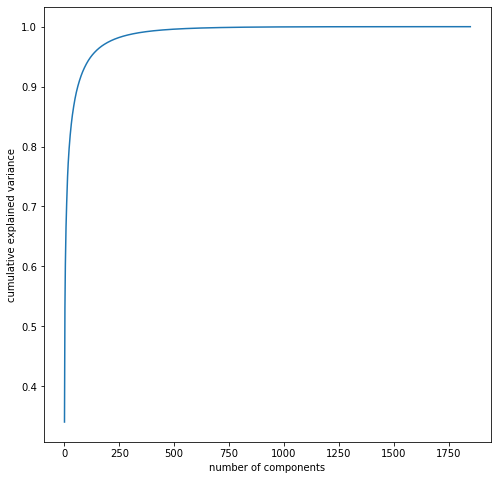

In [29]:
plot_pca(X_sm)

### Testing the 200 Component Dataset
* The PCA reduced dataset still achieves 99.24% accuracy.  The original SMOTE dataset 99.37%.
* PCA allows us to give up 1650 columns of data in this case for a cost 0.13% accuracy.  This seems like an acceptable tradeoff. 
* PCA also removes correlations from columns within a dataset.  This is an added benefit, since we are classifying image data and should help some of our classifiers perform better.

In [30]:
# Convert X_sm to 200 principal components
pca = PCA(n_components=200)
X_sm_pca200 = pca.fit_transform(X_sm)

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
print('Oversample all Classes to Majority Dataset @ 200 Principal Components')
print('----------------------------------------------------------------')
stratified_cross_validate(LogisticRegression(), X_sm_pca200, y_sm, cv)

Oversample all Classes to Majority Dataset @ 200 Principal Components
----------------------------------------------------------------
Fold Scores:
 
[0.98990785 0.99692848 0.99166301 0.99341817 0.99297938 0.98946907
 0.99385695 0.99122422 0.9921018  0.99297938]
 
Mean Accuracy:  0.9924528301886791
Mean Fit Time:  21.401887679100035
Mean Score Time:  0.011934900283813476
CV Time:  32.873955965042114


### Final Validation of all Our Models
**Here we perform a final set of 10-fold cross validations to see how the rest of our classifiers perform on the Oversampled PCA dataset.**

In [31]:
# Compare the Oversampled, PCA dataset our baseline accuracy
test_models(X_sm_pca200,y_sm)

GaussianNB
--------------------------------
Fold Scores:
 
[0.85476086 0.84598508 0.85256692 0.87055726 0.86704695 0.87011847
 0.85958754 0.85607723 0.87055726 0.85958754]
 
Mean Accuracy:  0.8606845107503291
Mean Fit Time:  0.1521017074584961
Mean Score Time:  0.8976805210113525
CV Time:  1.7651207447052002
 
MultinomialNB
--------------------------------
Fold Scores:
 
[nan nan nan nan nan nan nan nan nan nan]
 
Mean Accuracy:  nan
Mean Fit Time:  0.04610507488250733
Mean Score Time:  0.0
CV Time:  0.30233216285705566
 
SGDClassifier
--------------------------------
Fold Scores:
 
[0.89907854 0.89512944 0.90566038 0.90346643 0.90829311 0.89820097
 0.912681   0.90653796 0.90434401 0.91531373]
 
Mean Accuracy:  0.9048705572619571
Mean Fit Time:  3.6595816135406496
Mean Score Time:  0.010144948959350586
CV Time:  6.294384956359863
 
RandomForestClassifier
--------------------------------
Fold Scores:
 
[0.66608161 0.65247916 0.66213251 0.66915314 0.67003072 0.67354103
 0.67573497 0.6406